In [12]:
import pandas as pd
import quandl

In [13]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [14]:
quandl.ApiConfig.api_key = "GpVgeVazag5mR7JaB3Gn"

In [15]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [16]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

**Normalize Prices**

In [17]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [18]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [19]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [20]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


**Distribution**

In [21]:
for stock_df,allo in zip([aapl,cisco,amzn,ibm],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [22]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


**Investissement**

In [23]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

**Total Portfolio Value**

In [24]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [25]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665


In [26]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [27]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665


In [28]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [29]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06


In [30]:
import matplotlib.pyplot as plt

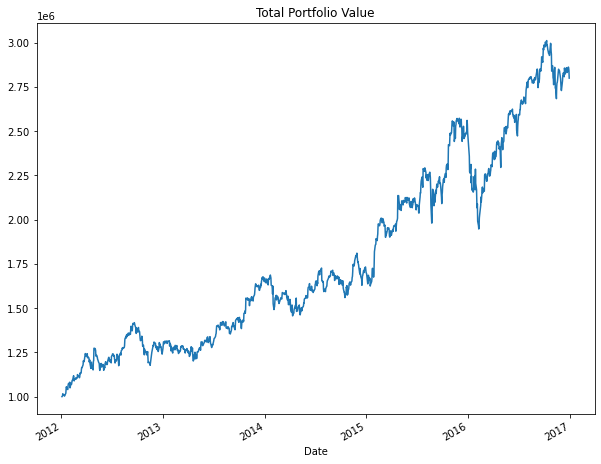

In [31]:
portfolio_val['Total Pos'].plot(figsize=(10,8),title='Total Portfolio Value')
plt.show();

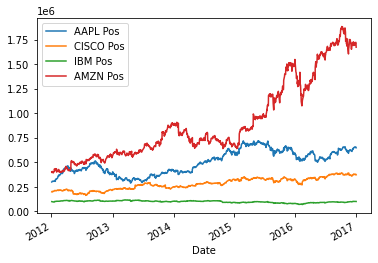

In [32]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line');

In [33]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,101839.988903,1.699358e+06,2.831931e+06
2016-12-27,657413.396830,379323.596496,102102.667778,1.723510e+06,2.862350e+06
2016-12-28,654610.167268,376108.989746,101522.330729,1.725141e+06,2.857383e+06
2016-12-29,654441.973495,376603.544631,101772.791982,1.709546e+06,2.842364e+06
2016-12-30,649340.095692,373636.215323,101400.154508,1.675406e+06,2.799783e+06


### Portfolio Statistics

**Daily Returns**

In [34]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

**Cumulative Return**

In [35]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Notre rendement était de {} %!'.format(cum_ret))

Notre rendement était de 179.97828220000912 %!


**Average Daily Return**

In [36]:
portfolio_val['Daily Return'].mean()

0.0009023579071769599

**Standard Deviation of Daily Return**

In [37]:
portfolio_val['Daily Return'].std()

0.012896893878458078

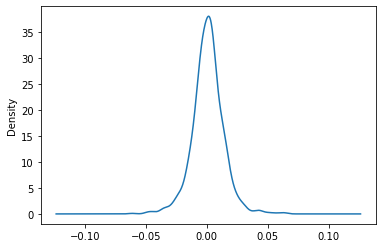

In [38]:
portfolio_val['Daily Return'].plot(kind='kde');

## Sharpe Ratio

In [39]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.0699670723571809

In [41]:
ASR = (252**0.5)*SR
ASR

1.1106928405221748

In [42]:
portfolio_val['Daily Return'].std()

0.012896893878458078

In [43]:
portfolio_val['Daily Return'].mean()

0.0009023579071769599

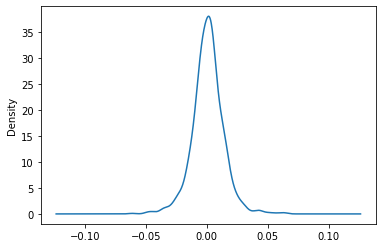

In [44]:
portfolio_val['Daily Return'].plot(kind='kde');

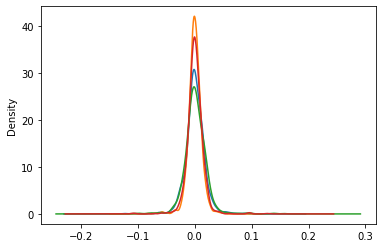

In [45]:
aapl['Adj. Close'].pct_change(1).plot(kind='kde')
ibm['Adj. Close'].pct_change(1).plot(kind='kde')
amzn['Adj. Close'].pct_change(1).plot(kind='kde')
cisco['Adj. Close'].pct_change(1).plot(kind='kde');